<a href="https://colab.research.google.com/github/Kendra-Musmaker/bio_test/blob/main/plot_telo_freq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   strain genotype  survivors   cells_plated  Individual_Frequency_true  \
0    6169    tlc1Δ        1.0   22890.532540                   0.000044   
1    6169    tlc1Δ       20.0     967.455621                   0.020673   
2    6169    tlc1Δ       14.0   94624.260360                   0.000148   
3    6169    tlc1Δ       14.0  196615.384600                   0.000071   
4    6169    tlc1Δ        6.0    1686.390533                   0.003558   

   Individual_Frequency  
0          4.368618e+05  
1          2.067278e+08  
2          1.479536e+06  
3          7.120501e+05  
4          3.557895e+07  


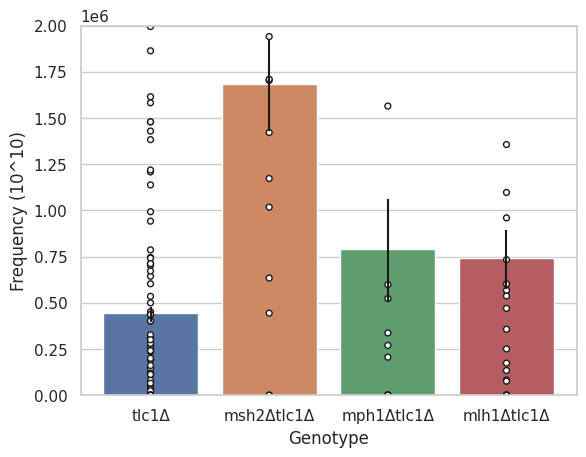

In [4]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# specify the file path
file_path = '/content/data_for_comp_sci.csv'

output_f = 'expt_1_summary.csv'

# read the CSV file using pandas read_csv() function
df = pd.read_csv(file_path)

# print the first 5 rows of the dataframe
#print(df)


# change the data type of the 'my_column' column from int to float
df = df.astype({'survivors': 'float'})
df = df.astype({'cells_plated': 'float'})

df['Individual_Frequency_true'] = df.survivors/df.cells_plated
df['Individual_Frequency'] = df.survivors/df.cells_plated * (10**10)

# print the first 5 rows of the dataframe
print(df.head())

# 'msh2Δtlc1Δ', 'tlc1Δ', 'mph1Δtlc1Δ', 'mlh1Δtlc1Δ'

genotypes_set = (set(df['genotype'].values))


counter = 0
for genotype in genotypes_set:
  # sum the values in 'my_column' where 'my_string_column' contains 'foo'
  total_survivors = df.loc[df['genotype'].str.contains(genotype), 'survivors'].sum()
  #print(total_survivors)

  total_cells = df.loc[df['genotype'].str.contains(genotype), 'cells_plated'].sum()
  #print(total_cells)

  total_frequency = total_survivors/total_cells
  #print(total_frequency)
#determining 95% confidence interval
#critical width is half the 95% CI
  critical_value = 1.96 * math.sqrt( (total_frequency*(1-total_frequency)) / total_cells ) 
#defining lower and upper bounds
  lower_ci = total_frequency - critical_value
  upper_ci = total_frequency + critical_value
#multipplying by 10^10 for graphing purposes. Setting error to be the width of the interval
  adjusted_total_frequency = total_frequency * (10**10)
  adj_lower_ci = lower_ci * (10**10)
  adj_upper_ci = upper_ci * (10**10)
  error_bar = adj_upper_ci - adj_lower_ci

#creating a datframe of summary statistics for the genotypes
  if counter == 0:
    new_row = ({'Genotype': genotype,
                'total_survivors': total_survivors,
                'total_cells': total_cells,
                'frequency_true': total_frequency,
                'Frequency (10^10)': adjusted_total_frequency,
                'error': error_bar,
                'Lower_CI_true': lower_ci,
                'Upper_CI_true': upper_ci,
                'Lower_CI': adj_lower_ci,
                'Upper_CI': adj_upper_ci})
    df_summary = pd.DataFrame(data=new_row, index=[0])
    counter += 1
  else:
    new_row =  pd.Series({'Genotype': genotype,
                          'total_survivors': total_survivors,
                          'total_cells': total_cells,
                          'frequency_true': total_frequency,
                          'Frequency (10^10)': adjusted_total_frequency,
                          'error': error_bar,
                          'Lower_CI_true': lower_ci,
                          'Upper_CI_true': upper_ci,
                          'Lower_CI': adj_lower_ci,
                          'Upper_CI': adj_upper_ci})
    df_summary = pd.concat([df_summary, new_row.to_frame().T], ignore_index=True)
#print(df_summary)
#telling it how to plot error bars
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

#creating a barplot of total frequency for each genotype with error bars being our 95% CI
sns.set(style="whitegrid")
ax = sns.barplot(data=df_summary, x='Genotype', y='Frequency (10^10)', errcolor='k', errwidth=10, errorbar=('ci', 95))
x_coords = [p.get_x() + 0.50 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() - 6000 for p in ax.patches]
#plot_errorbars(lambda x: (x.min(), x.max()))
ax.errorbar(x=x_coords, y=y_coords, yerr=df_summary["error"], fmt="none", c="k")
ax.set(ylim=(0,2000000))
#plotting individual frequencies on top of the bar graph of overall frequencies
sns.scatterplot(data=df, x='genotype', y='Individual_Frequency', size=200, color='w', edgecolor='k', linewidth=1, legend=False)


plt.show()

df_summary.to_csv(output_f, sep='\t')